In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd
from src.settings import SONGS_PATH
import glob
import os

dfs = []

for file in glob.glob(os.path.join(SONGS_PATH, "*.csv")):
    df = pd.read_csv(file)

    filename = os.path.basename(file)
    date = os.path.splitext(filename)[0]
    
    # Agregar columna con el nombre del archivo
    df['fecha'] = date
    
    dfs.append(df)

# Concatenar todos los DataFrames
df = pd.concat(dfs, ignore_index=True)

# Parsear día y hora
df['fecha'] = pd.to_datetime(df['fecha'], format='%d-%m-%Y')
df['hora'] = pd.to_timedelta(df['hora'])
df['fecha'] = df['fecha'] + df['hora']
df.drop(columns='hora', inplace=True)

df.head()

,artista,cancion,fecha
0,DONNA LEWIS,I COULD BE THE ONE,2026-01-01 00:00:00
1,FOREIGNER,URGENT,2026-01-01 00:03:16
2,TAYLOR SWIFT,BLANK SPACE (TAYLOR'S VERSION),2026-01-01 00:07:37
3,DAVID BOWIE,LET'S DANCE,2026-01-01 00:11:57
4,KOLUMBIA,GENIO,2026-01-01 00:16:18


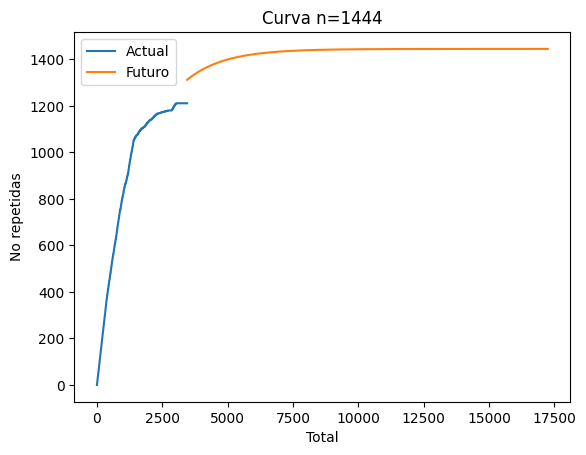

In [4]:
from src.analysis import plot_curve

plot_curve(df)

In [4]:
df_counts = df.groupby(['artista', 'cancion']).size().reset_index(name='counts')
df_counts.head()

'''
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_counts.sort_values('artista'))
'''

print(len(df_counts))
print(len(df))

1211
3495


In [5]:
df_counts.sort_values('counts', ascending=False).head()

,artista,cancion,counts
307,EUROPE,CARRIE,9
96,BILLY IDOL,EYES WITHOUT A FACE,9
1115,THE PRETENDERS,BRASS IN POCKET,7
354,FRAN QUINTERO,TE VAS,7
62,ANTENA ORGÁNICA,GIRASOLES,7


In [6]:
# CON REPETICIONES
df_art = df_counts[['artista', 'counts']].groupby('artista').sum().reset_index()
df_art = df_art.sort_values('counts', ascending=False)
df_art.head(10)

,artista,counts
253,NICOLE,45
234,MICHAEL JACKSON,45
194,LA LEY,45
220,MADONNA,43
137,GEPE,41
165,JAVIERA MENA,39
166,JAVIERA PARRA,35
374,THE ROLLING STONES,35
269,PEDRO PIEDRA,33
212,LOS TRES,32


In [7]:
# SIN REPETICIONES
df_art = df_counts[['artista']].groupby('artista').size().reset_index(name='counts')
df_art = df_art.sort_values('counts', ascending=False)
df_art.head(10)

,artista,counts
220,MADONNA,20
234,MICHAEL JACKSON,17
354,THE BEATLES,16
212,LOS TRES,15
209,LOS PRISIONEROS,15
136,GEORGE MICHAEL,13
121,FITO PAEZ,13
324,SODA STEREO,13
194,LA LEY,13
59,CHARLY GARCIA,12


In [8]:
df_counts[df_counts['artista'] == 'MADONNA']

,artista,cancion,counts
642,MADONNA,BORDERLINE,3
643,MADONNA,CHERISH,2
644,MADONNA,CRAZY FOR YOU,2
645,MADONNA,EXPRESS YOURSELF,3
646,MADONNA,HOLIDAY,1
647,MADONNA,I'LL REMEMBER,2
648,MADONNA,INTO THE GROOVE,1
649,MADONNA,JUMP,2
650,MADONNA,LA ISLA BONITA,2
651,MADONNA,LIKE A PRAYER,2


In [9]:
df_app = df.sort_values('fecha').drop_duplicates(subset=['artista'])
df_app.tail(10)


,artista,cancion,fecha
1417,MIGUEL BOSE,MORENA MIA,2026-01-05 10:39:58
1553,SPIN DOCTORS,TWO PRINCES,2026-01-05 20:04:09
1591,TAM TAM GO,ESPALDAS MOJADAS,2026-01-05 22:42:56
1636,PEDRO SUAREZ VERTIZ,ME ESTOY ENAMORANDO,2026-01-06 01:41:26
1823,FUGEES,KILLING ME SOFTLY,2026-01-06 14:31:38
1840,ATERCIOPELADOS,BOLERO FALAZ,2026-01-06 15:42:43
2253,MATCHBOX TWENTY,IF YOU'RE GONE,2026-01-08 18:59:45
2541,DAVID LEBON,PUEDO SENTIRLO,2026-01-10 12:42:21
2555,GEORGE BAKER SELECTION,LITTLE GREEN BAG,2026-01-10 13:37:29
2573,ELASTICA,CONNECTION,2026-01-10 15:00:23
